<a href="https://colab.research.google.com/github/skck0226/2022S-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [ ]:
cd /content/

/content


## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [ ]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=77)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=77)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



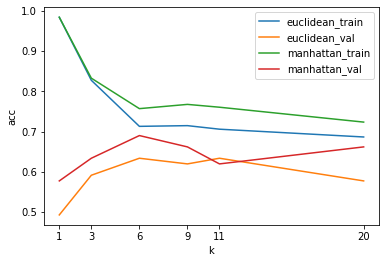

0.6901408450704225

In [ ]:
### 문제 1 ###
## 코드 작성 ##

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

neighbor = [1,3,6,9,11,20]
euclidean_train = []
euclidean_validation = []
manhattan_train = []
manhattan_validation = []
# knn 알고리즘 거리척도 euclidean k값 neighbor list에서 반복 추출, 모델 학습 후 정확도 계산
for i in neighbor:
    knn = KNeighborsClassifier(n_neighbors = i, metric="euclidean")
    knn.fit(X_train,y_train)
    euclidean_train.append(knn.score(X_train, y_train))
    knn.fit(X_train, y_train)
    euclidean_validation.append(knn.score(X_val, y_val))

# knn 알고리즘 거리척도 manhattan k값 neighbor list에서 반복 추출, 모델 학습 후 정확도 계산
for i in neighbor:
    knn = KNeighborsClassifier(n_neighbors = i, metric = "manhattan")
    knn.fit(X_train,y_train)
    manhattan_train.append(knn.score(X_train, y_train))
    knn.fit(X_train, y_train)
    manhattan_validation.append(knn.score(X_val, y_val))

# plt 그래프
plt.xlabel('k')
plt.ylabel('acc')
plt.xticks(neighbor)
plt.plot(neighbor,euclidean_train,label='euclidean_train')
plt.plot(neighbor,euclidean_validation,label='euclidean_val')
plt.plot(neighbor,manhattan_train,label='manhattan_train')
plt.plot(neighbor,manhattan_validation,label='manhattan_val')
plt.legend()
plt.show() 

# 최적의 하이퍼파라미터, k=6 , 거리척도 manhattan으로 학습 후 test set에 대한 정확도 계산
knn = KNeighborsClassifier(n_neighbors = 6, metric = "manhattan")
knn.fit(X_train,y_train)
knn.score(X_test,y_test)    

**설명 작성**  
- 최적의 파라미터: k값 6, 거리 척도 manhattan
- 설명: 거리척도로 euclidean과 manhattan을, k값으로 [1,3,6,9,11,20]을 적용하여 knn모델을 훈련시켜 모든 조합에 대해 train,validation acuuracy를 비교하였다. euclidean 과 manhattan 과의 비교에서 manhattan이 train,과 validation accuracy 모두 앞섰다.
k값은 validation accuracy값이 가장 크고 train과 validation 그래프가 가장 가까운 지점인 k=6을 선택했다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


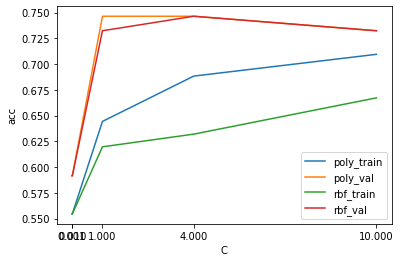

0.7323943661971831

In [ ]:
### 문제 2 ###
## 코드 작성 ##
from sklearn import svm
poly_train = []
poly_val = []
rbf_train = []
rbf_val = []
# C = [1,2,4,10]
C = [0.001, 0.01, 1, 4,10]

# polynomial kernel trick 케이스, C값 c list에서 하나씩 추출, 각 kernel과 c값으로 학습 후 정확도 계산
for c in C:
  _svm = svm.SVC(C=c, kernel="poly")
  _svm.fit(X_train, y_train)
  poly_train.append(_svm.score(X_train, y_train))
  poly_val.append(_svm.score(X_val,y_val))

# rbf kernel trick 케이스, C값 c list에서 하나씩 추출, 각 kernel과 c값으로 학습 후 정확도 계산
for c in C:
  _svm = svm.SVC(C=c, kernel="rbf")
  _svm.fit(X_train, y_train)
  rbf_train.append(_svm.score(X_train, y_train))
  rbf_val.append(_svm.score(X_val, y_val))

# plt 그래프 그리기
plt.xlabel('C')
plt.ylabel('acc')
plt.xticks(C)
plt.plot(C,poly_train,label='poly_train')
plt.plot(C,poly_val,label='poly_val')
plt.plot(C,rbf_train,label='rbf_train')
plt.plot(C,rbf_val,label='rbf_val')
plt.legend()
plt.show() 

# 가장 최적의 하이퍼파라미터로 추정되는 c=4, polynomial 커널을 이용하여 학습 후 test set에 대한 정확도 계산
_svm = svm.SVC(C=4, kernel="poly")
_svm.fit(X_train, y_train)
_svm.score(X_test, y_test)

**설명 작성**  
- 최적의 파라미터: C가 4, kernel 트릭 polynomial
- 설명: kernel trick으로 polynomial과 rbf를, C값으로 [0.001,0.1,1,4,10]을 적용하여 svm모델을 훈련시켜 모든 조합에 대해 train,validation acuuracy를 비교하였다.  polynomial이 train, validation 모두에서 accuracy가 높게 나타났고, validation accuracy가 C가 4일 때 polynomial, rbf 에서 최적으로 높다.



---



## 문제3 Cross validation with Random Forest

1.   항목 추가
2.   항목 추가


### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

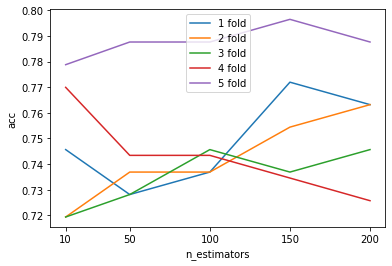

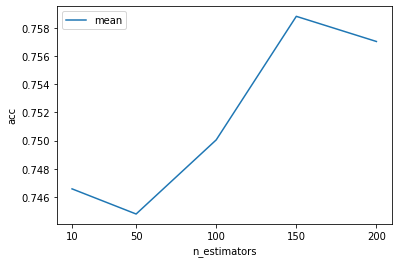

0.7605633802816901

In [ ]:
### 문제 3-1 ###
## 코드 작성 ##

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# from sklearn.model_selection import GridSearchCV
# param_grid = {
#                  'n_estimators': [5, 10, 15, 20]
#                 #  'max_depth': [2, 5, 7, 9]
#              }

# grid_clf = GridSearchCV(clf, param_grid, cv=5)
# grid_clf.fit(X_train, y_train)
# grid_clf.scorer_ 
# 그리드 서치
first = []
second = []
third = []
fourth = []
fifth = []
mean = []
n_estimators = [10,50,100,150,200]
# random forest 파라미터인 트리의 갯수 배열에 대해 5fold cv를 실행하여 validation들의 평균이 가장 높은 트리 갯수를 구한다. 하이퍼 파라미터 결정 
for i in n_estimators:
  clf = RandomForestClassifier(n_estimators=i, random_state=77) 
  cv = cross_val_score(clf, X_train, y_train, cv=5)
  first.append(cv[0])
  second.append(cv[1])
  third.append(cv[2])
  fourth.append(cv[3])
  fifth.append(cv[4])
  mean.append(np.mean(cv))
  
# k fold cv 에서 x축 트리의 갯수(파라미터) y축 정확도로 하여 각 fold들의 정확도를 그래프로 그림
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.xticks(n_estimators)
plt.plot(n_estimators, first, label = "1 fold")
plt.plot(n_estimators, second, label = "2 fold")
plt.plot(n_estimators, third, label = "3 fold")
plt.plot(n_estimators, fourth, label = "4 fold")
plt.plot(n_estimators, fifth, label = "5 fold")
plt.legend()
plt.show() 

# 각 fold cv의 validation들의 평균을 트리의 갯수별로 나타냄
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.xticks(n_estimators)
plt.plot(n_estimators, mean, label = "mean")
plt.legend()
plt.show() 

# 최적의 트리의 갯수를 찾아서 모델 학습 후 테스트 셋에 대한 정확도 계산
clf = RandomForestClassifier(n_estimators= 150, random_state=77) 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

**설명 작성**  
- test accuracy: 0.7605
- 최적의 파라미터: n_estimators = 150
- 설명: n_estimators는 random forest를 구성하는 결정트리의 갯수이다 많을수록 좋은 경향이 있다. 다만 연산이 많아짐. loocv 언제끝나지..
random forest의 Idea는 각각의 tree는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 overfitting하는 경향을 가진다는 데 기초합니다.
잘 작동하되 서로 다른 방향으로 overfitting된 tree를 많이 만들면 그 결과를 평균냄으로써 overfitting된 양을 줄일 수 있습니다.
이렇게 하면 tree model의 예측 성능이 유지되면서 overfitting이 줄어드는 것이 수학적으로 증명되었습니다.(참조 https://woolulu.tistory.com/28)
다른 hyper parameter로는 트리의 깊이, 참조할 feature의 갯수가 있다.



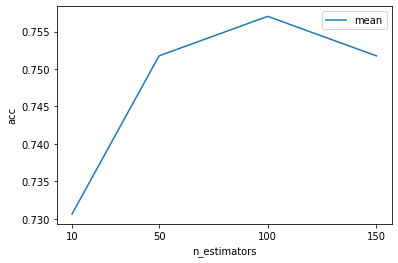

In [ ]:
### 문제 3-2 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
n_estimators = [10, 50, 100, 150]

mean = []

# cv 중 least one out 기법을 적용하여 cv 수행 후 각 파라미터 별 평균 validation 구함
for i in n_estimators:
  clf = RandomForestClassifier(i)
  cv = cross_val_score(clf, X_train, y_train, cv=LeaveOneOut())
  mean.append(np.mean(cv))

# 파라미터 별 평균 validatoin 그래프로 나타냄 최적의 파라미터 결정
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.xticks(n_estimators)
plt.plot(n_estimators, mean, label = "mean")
plt.legend()
plt.show() 



In [ ]:
clf = RandomForestClassifier(50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7887323943661971

**설명 작성**  
- test accuracy: 0.8028
- 최적의 파라미터: n_estimators = 50
- 설명: loocv 를 통해 validation set을 n개만큼 생성하여 모든 accuracy를 평균낸 validation accuracy 값이 n_estimators가 50일 때 가장 높다. 모든 set들을 한번 씩 다 validation하기에 train set과 validation set을 나눌 필요가 없다. cross validation을 통해 hyper_parameter를 결정할 수 있었다.



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

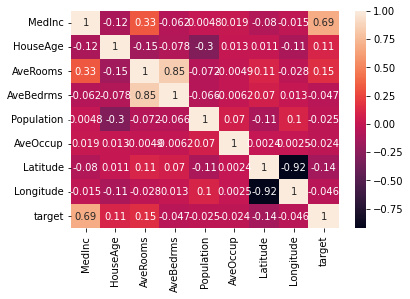

In [ ]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True)

plt.show()

- **Feature들 간 관계 서술**  
  답: pearson correlation이 0과 가까울 수록 상관관계가 없는 것이고, 멀수록, -1혹은 1과 가까울수록 상관관계가 큰 것이다. target과의 연관성만을 따졌을 때 Medinc은 가장 양의 방향으로 연관성이 높다고 볼 수 있고, houseage, aveRooms는 약한 양의 상관관계를 가지고 latitude는 약한 음의 상관관계를 나머지 +- 0.1보다 작은 feature들은 상관관계가 없다고 보여진다.
  

- **최종 선택한 feature들**  
  답: 약한 상관관계까지 포함하기로 결정하였고 최종적으로 MedInc, HouseAge, AveRooms, Latitude가 포함되었다.

In [ ]:
### 문제 4-1 ###
# 새 dataframe 만들기 
df = df.drop(['AveBedrms','Population','AveOccup','Longitude'],axis=1,inplace=False)

y = df['target']
X = df.drop(['target'],axis=1)



### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [ ]:
### 문제 4-2 ###
## 코드 작성 ##

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.1, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds_train = lr.predict(X_train)
train_mse = mean_squared_error(y_train, y_preds_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_preds_train)


y_preds_test = lr.predict(X_test)
test_mse = mean_squared_error(y_test, y_preds_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_preds_test)

print(train_mse)
print(train_r2)

print(test_mse)
print(test_r2)

0.6365475260340381
0.5215139742213231
0.6762466341562652
0.4955083848335222


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: prediction 결과 mean squared error 값이 train에서 더 낮은걸로 확인된다. r_square 값은 train에서 더 높게 나타난다. 이 두 가지 값으로 미루어 봤을 때 이 Linear Regression모델은 training data에 overfit하다고 볼 수 있다. overfiting의 원인은 모델이 너무 복잡하거나, 데이터가 적다는 것이 있따. overfiting 을 해결하기 위해선 데이터의 수를 늘린다.
모델의 Complexity를 줄인다. Regularization을 사용한다. 등의 방법이 있다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error

# train test 비율 9:1로 나눔
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.1, random_state=156)

# train 을 train , validation 비율 8:1로 나눔 최종적으로 8:1:1
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=156)

alpha = [0.0001, 0.001,0.01,0.1,10]
ridge_r2 = []
lasso_r2 = []
# alpha값들에 대해 반복적으로 ridge lasso regression 모델 학습, validation set 으로 예측값 구하고, 예측값들과 실제 값들 비교하여 r2_score 구함
for i in alpha:
  ridge = Ridge(alpha = i)  
  lasso = Lasso(alpha = i)

  ridge.fit(X_train,y_train)
  lasso.fit(X_train,y_train)

  ridge_y_hat = ridge.predict(X_val)
  lasso_y_hat = lasso.predict(X_val)

  ridge_r2.append(r2_score(y_val,ridge_y_hat))
  lasso_r2.append(r2_score(y_val,lasso_y_hat))

print(ridge_r2)
print(lasso_r2)
  


[0.5066970988644737, 0.5066970990985719, 0.5066971014395394, 0.5066971248477206, 0.5066996831833248]
[0.506697116203489, 0.5066965361059582, 0.5066462148433812, 0.5025323044927583, -0.00029437388163700007]


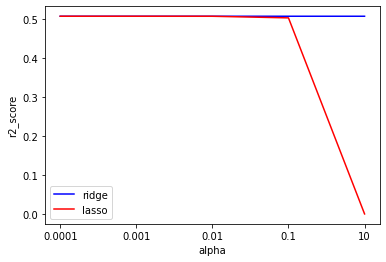

In [ ]:
### 문제 4-3 ###
## 그래프 작성 ##

plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.plot(range(len(alpha)), ridge_r2, label = "ridge", color = "blue")
plt.plot(range(len(alpha)), lasso_r2, label = "lasso", color = "red")
plt.xticks(range(len(alpha)),alpha)
plt.yticks()
plt.legend()
plt.show() 

- Rridge regression 모델 최적의 alpha 값: 0.01
- Lasso regression 모델 최적의 alpha 값: 0.01

In [ ]:
### 문제 4-3 ###
# 최종 결과 출력
optimal_a = 0.01

ridge = Ridge(alpha = optimal_a)  
lasso = Lasso(alpha = optimal_a)

# train 과 validation set 합쳐서 모델 훈련 시킴
X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)

# 모델 훈련
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

# 예측값
ridge_y_hat = ridge.predict(X_test)
lasso_y_hat = lasso.predict(X_test)

# 예측값과 실제값으로 r2_score 구함
ridge_r2 = r2_score(y_test,ridge_y_hat)
lasso_r2 = r2_score(y_test,lasso_y_hat)

print(ridge_r2)
print(lasso_r2)


0.49550838651335505
0.49542810534892245
